# Task 4: Exploratory Data Analysis - Terrorism

## Author - Sachin Singh

# Goals: 
# 1. Perform EDA on given dataset.
# 2. Derive security issues and insights

## Importing libraries

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

In [162]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1', low_memory=False)

In [163]:
data.shape

(181691, 135)

In [164]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning

In [165]:
## there are total 135 columns 
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [166]:
## select important columns
data = data [['iyear', 'imonth', 'iday', 'country_txt', 'region_txt','provstate', 'city', 
              'summary', 'multiple', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'gname', 
              'weaptype1_txt', 'nkill', 'nwound', 'nkillter']]

In [167]:
data.shape

(181691, 17)

In [168]:
### rename columns 
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday': 'Day', 'country_txt' : 'Country', 'region_txt' :
                     'Region', 'provstate' : 'State','city': 'City', 'summary': 'Summary', 'multiple': 'Multiple',
                     'attacktype1_txt': 'AttackType', 'targtype1_txt': 'TargetType','targsubtype1_txt':
                     'TargetSubtype', 'gname': 'GroupName','weaptype1_txt': 'WeaponType', 'nkill': 'Kills', 
                     'nwound' : 'Wounds', 'nkillter': 'SelfKills'}, inplace = True)

In [169]:
## data after renaming and removing some columns 
data.head(10)

,Year,Month,Day,Country,Region,State,City,Summary,Multiple,AttackType,TargetType,TargetSubtype,GroupName,WeaponType,Kills,Wounds,SelfKills
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,0.0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,0.0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,0.0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,0.0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN,NaN
5,1970,1,1,United States,North America,Illinois,Cairo,1/1/1970: Unknown African American assailants ...,0.0,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms,0.0,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,NaN,0.0,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms,0.0,0.0,NaN
7,1970,1,2,United States,North America,California,Oakland,1/2/1970: Unknown perpetrators detonated explo...,0.0,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives,0.0,0.0,0.0
8,1970,1,2,United States,North America,Wisconsin,Madison,"1/2/1970: Karl Armstrong, a member of the New ...",0.0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary,0.0,0.0,0.0
9,1970,1,3,United States,North America,Wisconsin,Madison,"1/3/1970: Karl Armstrong, a member of the New ...",0.0,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary,0.0,0.0,0.0


In [176]:
## find duplicates
data.duplicated().sum()

10756

In [177]:
## drop duplicate values
data.drop_duplicates(keep= 'first', inplace = True)

In [178]:
## data shape after dropping values
data.shape

(170935, 17)

In [170]:
## null values
print('Null values in every column: \n', data.isnull().sum())

Null values in every column: 
 Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
City               434
Summary          66129
Multiple             1
AttackType           0
TargetType           0
TargetSubtype    10373
GroupName            0
WeaponType           0
Kills            10313
Wounds           16311
SelfKills        66958
dtype: int64


In [179]:
data.head()

,Year,Month,Day,Country,Region,State,City,Summary,Multiple,AttackType,TargetType,TargetSubtype,GroupName,WeaponType,Kills,Wounds,SelfKills
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,0.0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,0.0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,0.0,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,0.0,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN,NaN


# Data Overview

### 1. Number of Terrorist Attacks

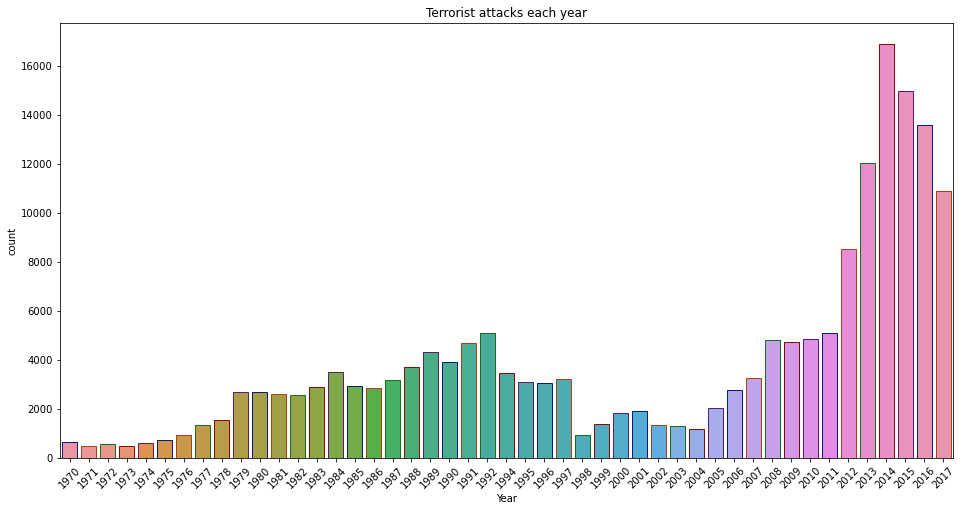

In [62]:
plt.figure(figsize=(16,8))
sns.countplot(x=data.Year, edgecolor= sns.color_palette('dark', 5))
plt.xticks(rotation = 45)
plt.title('Terrorist attacks each year')
plt.show()

1. 2014 is peak year for terrorist attacks. 2. Number of terrorist attacks have increased over time .

### 2. Type of terrorist attack

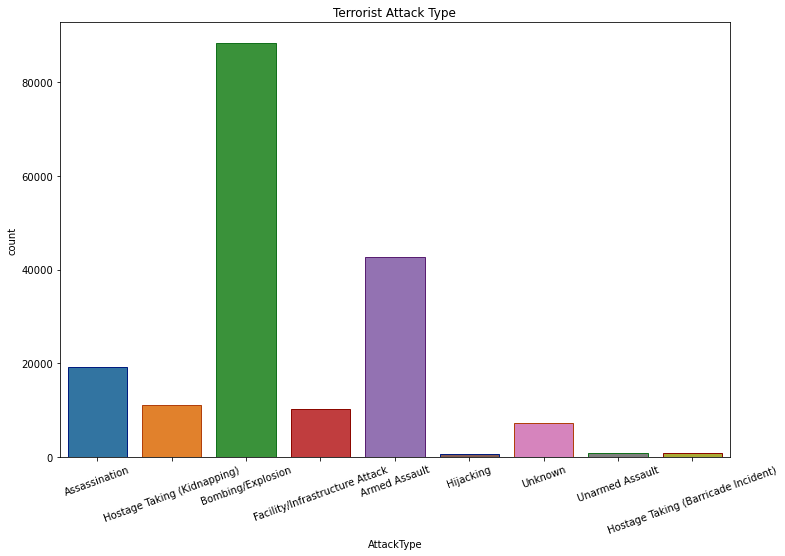

In [67]:
plt.figure(figsize= (12,8))
sns.countplot(x = data.AttackType, edgecolor= sns.color_palette('dark', 5))
plt.xticks(rotation = 20)
plt.title('Terrorist Attack Type')
plt.show()

Bombing/Explosion is most used for terrorist attacks followed by Armed Assault. 

### 3. Target Distribution  

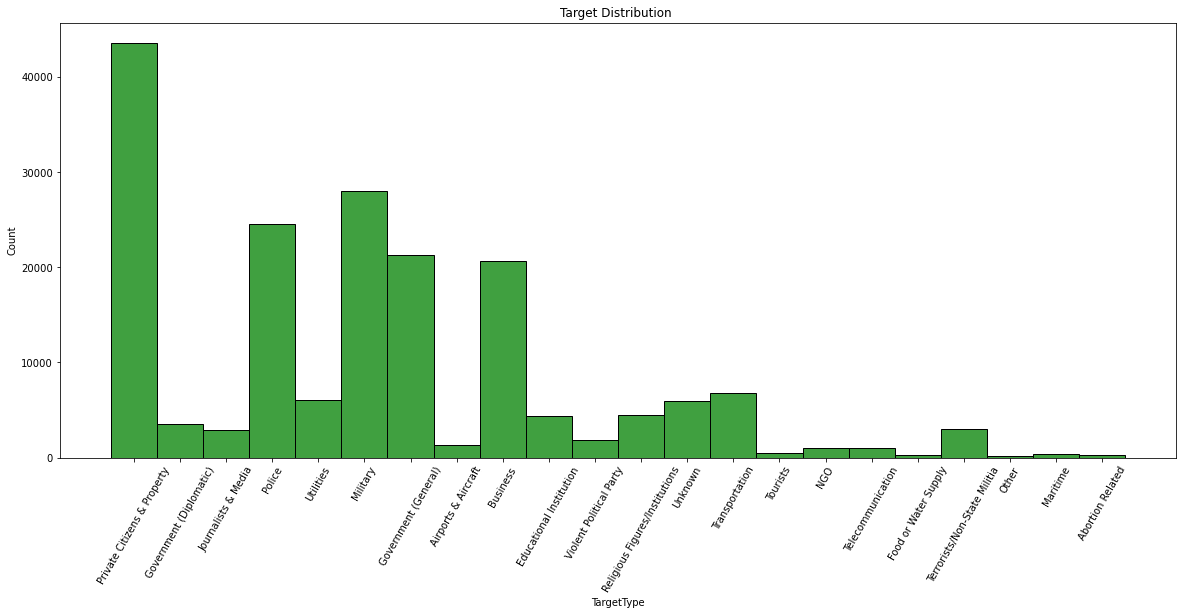

In [82]:
plt.figure(figsize= (20,8))
sns.histplot(x = data.TargetType, color= 'green')
plt.xticks(rotation = 60)
plt.title('Target Distribution ')
plt.show()

Private citizens & Property are most targetted followed by Military and Police.

### 4. Country Distribution

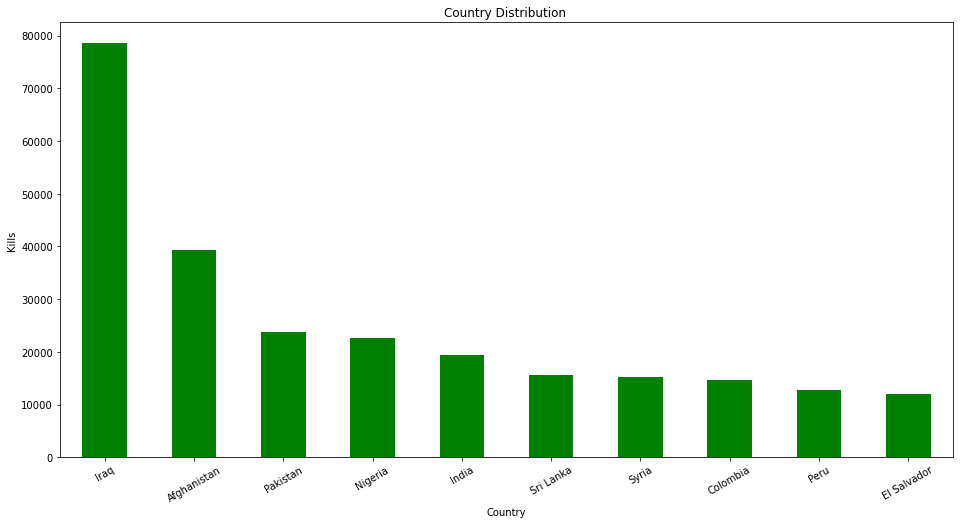

In [122]:
plt.figure(figsize= (16,8))
data.groupby(['Country'])['Kills'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 30)
plt.ylabel('Kills')
plt.title('Country Distribution ')
plt.show()

### 5. Terrorist Groups

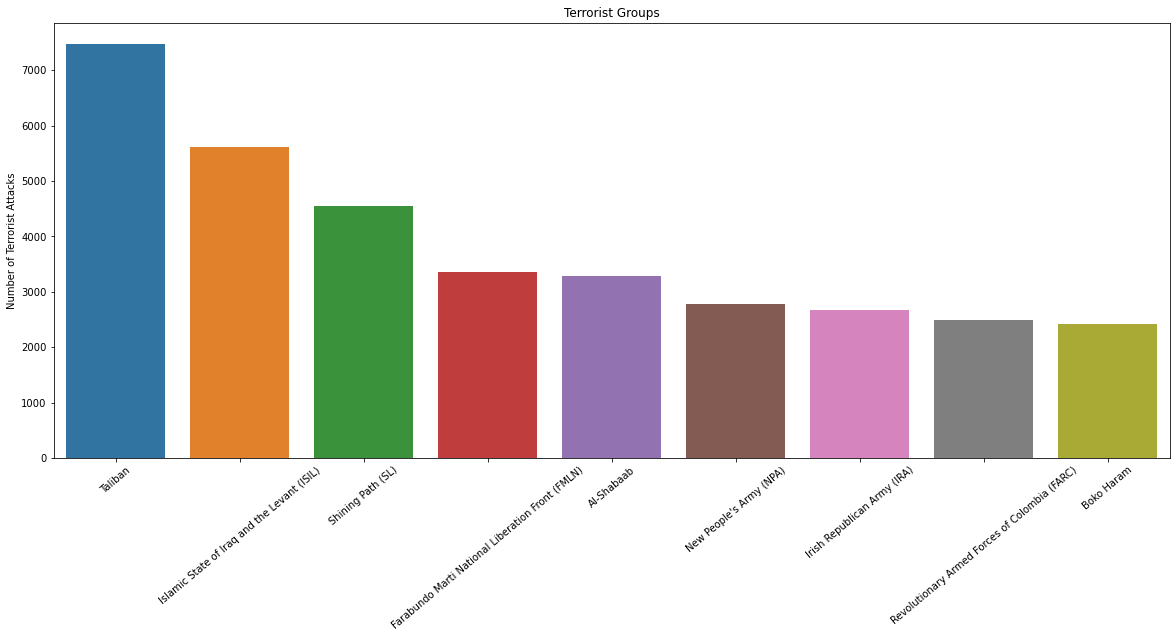

In [121]:
sns.barplot(y = data.GroupName.value_counts()[1:10].values,x = data.GroupName.value_counts()[1:10].index)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.xticks(rotation=40)
plt.ylabel('Number of Terrorist Attacks')
plt.title('Terrorist Groups')
plt.show()

### 6. Region Distribution

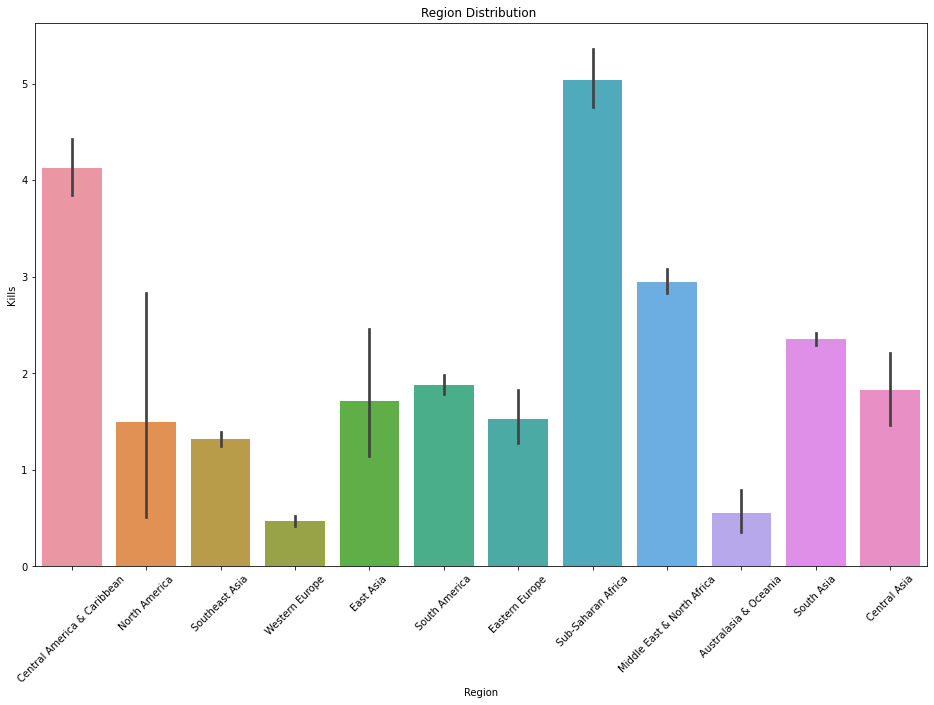

In [180]:
plt.figure(figsize= (16,10))
sns.barplot(x = data.Region, y = data.Kills)
plt.ylabel('Kills')
plt.xticks(rotation = 45)
plt.title('Region Distribution ')
plt.show()

### 7. Attacks and Kills Distribution 

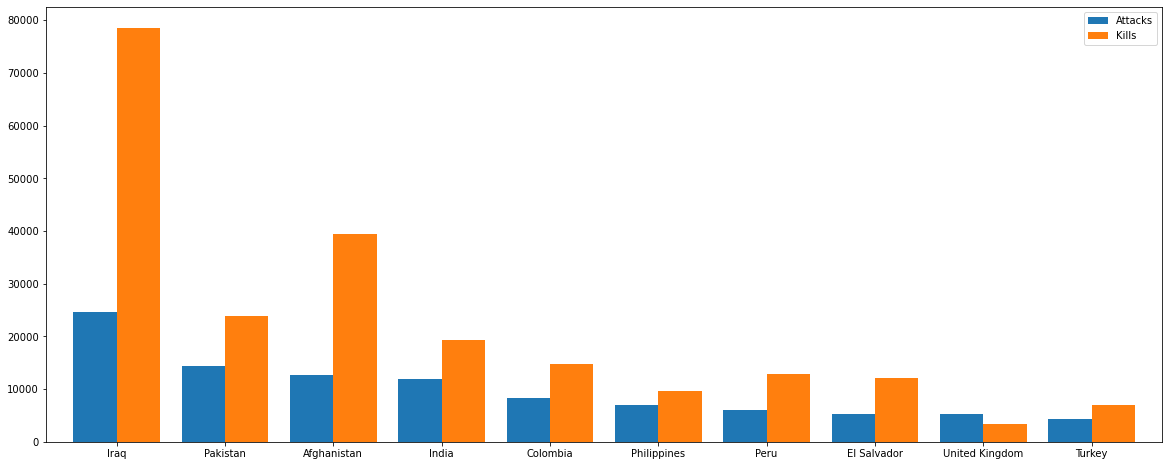

In [148]:
country_ten = data['Country'].value_counts()[:10].to_frame()
country_ten.columns=['Attacks']
country_kill=data.groupby('Country')['Kills'].sum().to_frame()
country_ten.merge(country_kill,left_index=True,right_index=True,how='left').plot.bar(width = 0.8)
fig = plt.gcf()
plt.xticks(rotation = 0)
fig.set_size_inches(20,8)
plt.show()

###  8. Region Affected Over Time

In [182]:
## Making a croostab table between year and region 
data_cross = pd.crosstab(data.Year, data.Region)
data_cross.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,27,461,63,1,10,3,48
1971,1,5,0,1,3,55,235,22,0,6,2,124
1972,5,3,0,0,1,48,71,21,1,12,2,356
1973,1,6,0,2,1,19,62,81,1,2,4,286
1974,1,11,0,4,2,39,108,70,2,3,7,311


<Figure size 1152x720 with 0 Axes>

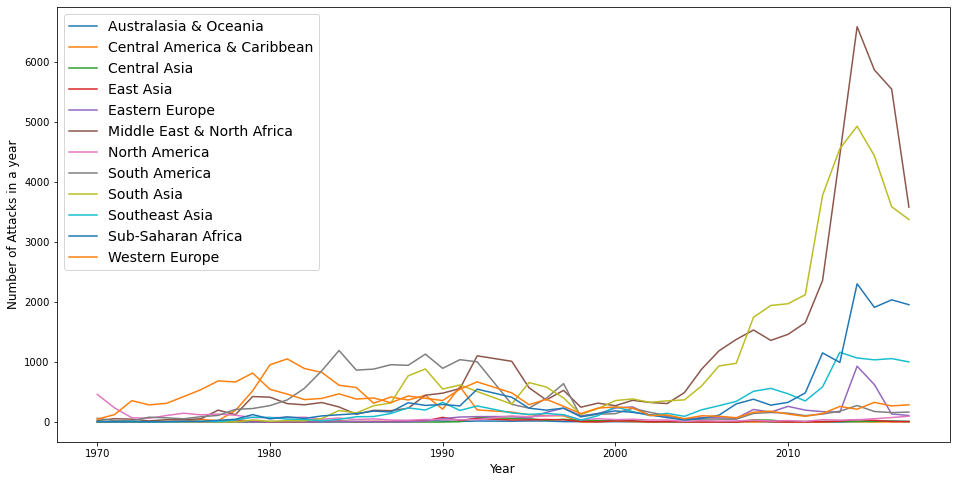

In [193]:
plt.figure(figsize=(16,10))
data_cross.plot(figsize=(16,8))
plt.xlabel('Year', fontsize = 'large')
plt.ylabel('Number of Attacks in a year', fontsize = 'large')
plt.legend(fontsize = 14)
plt.show()

To make more clear plots, we can use decade instead of year. 
 For this first make a decade column for dataset acc. to year.

In [195]:
data['Decade'] = pd.cut(data.Year, bins=[1969, 1980, 1990, 2000, 2010, 2020], 
                     labels=['70s', '80s', '90s', '00s', '10s'])
data.head(3)

,Year,Month,Day,Country,Region,State,City,Summary,Multiple,AttackType,TargetType,TargetSubtype,GroupName,WeaponType,Kills,Wounds,SelfKills,Decade
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,0.0,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0,NaN,70s
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,NaN,70s
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,0.0,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,NaN,70s


In [197]:
## Making a croostab table between decade and region 
data_decade = pd.crosstab(data.Decade, data.Region)
data_decade.head(3)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Decade,,,,,,,,,,,,
70s,20,1775,0,75,25,1440,1597,1220,63,251,292,4801
80s,89,5715,0,181,97,2841,507,8650,3237,1243,1749,3997
90s,99,1312,345,268,1203,4973,624,3964,3774,1399,2305,3257


<Figure size 1152x720 with 0 Axes>

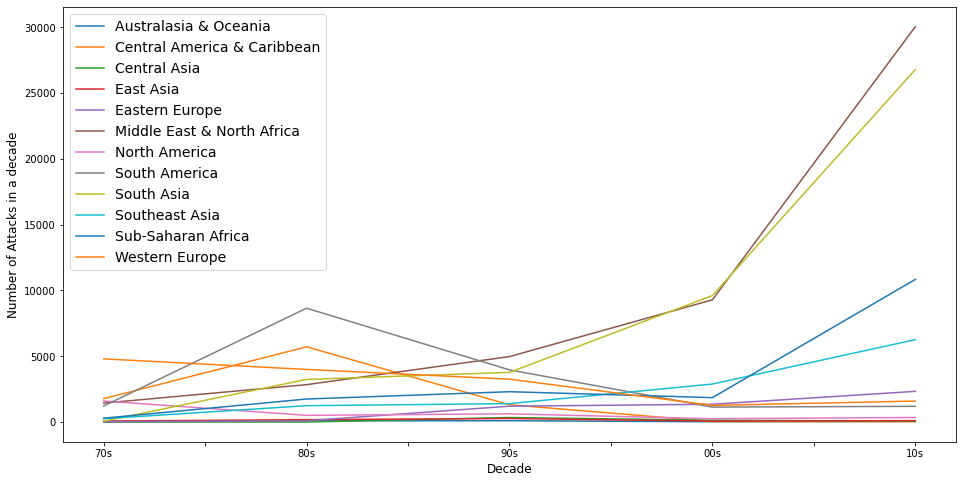

In [198]:
plt.figure(figsize=(16,10))
data_decade.plot(figsize=(16,8))
plt.xlabel('Decade', fontsize = 'large')
plt.ylabel('Number of Attacks in a decade', fontsize = 'large')
plt.legend(fontsize = 14)
plt.show()

Terrosism in middle east and north africa is continuosly increasing and same trend can observed in South asia region. 


### 9. Use of Weapon Over Time

In [204]:
## Making a croostab table between Decade and weapon type 
data_weapon = pd.crosstab(data.Decade, data.WeaponType)
data_weapon.head()

WeaponType,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Decade,,,,,,,,,,,,
70s,0,35,4854,4,3998,1271,91,6,2,5,1291,2
80s,8,21,11828,1,12177,1496,309,6,1,22,2428,9
90s,1,65,8755,18,9210,1780,1059,29,10,11,2567,18
00s,22,73,15436,6,8670,1459,566,17,1,44,1601,17
10s,4,127,44712,4,23136,3413,1500,53,0,54,6542,90


<Figure size 1152x720 with 0 Axes>

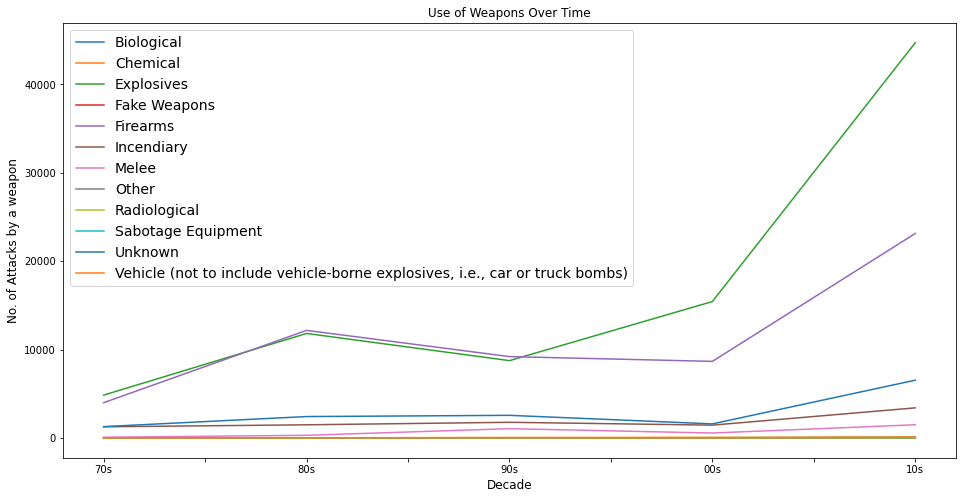

In [205]:
plt.figure(figsize=(16,10))
data_weapon.plot(figsize=(16,8))
plt.xlabel('Decade', fontsize = 'large')
plt.ylabel('No. of Attacks by a weapon', fontsize = 'large')
plt.title('Use of Weapons Over Time')
plt.legend(fontsize = 14)
plt.show()

It can be clearly observed that Explosives and Firearms are most preferred choice for terrorist activities while explsoives are being mostly used.

### 10. Terrorist targets over time

In [206]:
## Making a croostab table between Decade and target type 
data_target = pd.crosstab(data.Decade, data.TargetType)
data_target.head()

TargetType,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
Decade,,,,,,,,,,,,,,,,,,,,,
70s,14,346,2632,370,21,755,1514,371,27,1274,...,1226,1834,153,73,163,48,322,108,185,71
80s,98,362,4035,504,87,744,3697,579,88,5503,...,3420,4956,485,205,244,56,1490,149,1293,222
90s,117,262,3265,394,37,740,3249,537,92,2650,...,2979,5261,693,98,352,159,1214,314,537,386
00s,14,147,2816,1007,56,480,4206,365,55,2173,...,3724,8559,817,248,463,95,1298,255,626,202
10s,13,192,5827,1867,94,742,7632,1000,78,15908,...,12397,20716,2126,294,1779,69,1728,4390,1410,920


<Figure size 1152x720 with 0 Axes>

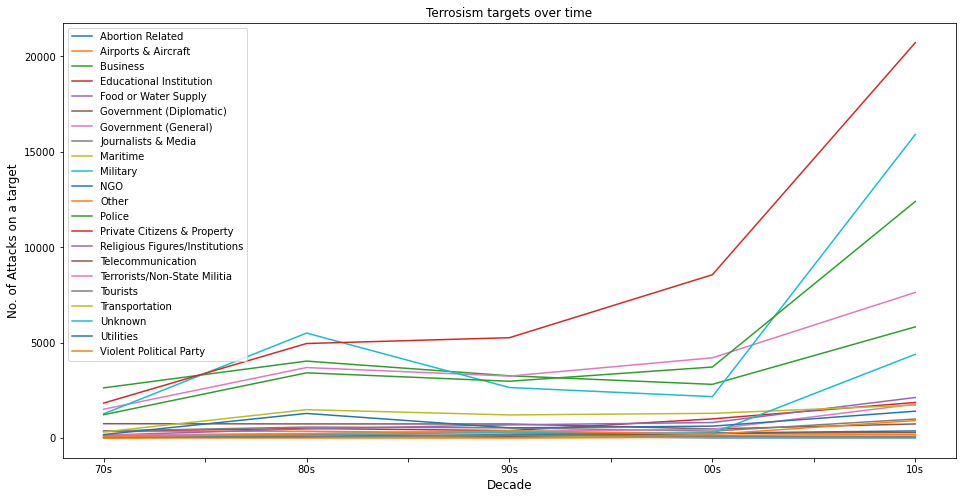

In [208]:
plt.figure(figsize=(16,10))
data_target.plot(figsize=(16,8))
plt.xlabel('Decade', fontsize = 'large')
plt.ylabel('No. of Attacks on a target', fontsize = 'large')
plt.title('Terrosism targets over time')
plt.legend(fontsize = 10)
plt.show()

Private citizens and property are most preferred target choice for terrorists and military is being targetted after 2000 mostly. 

## Conclusions: 
### 1. Private citizens and property are most preferred target choice for terrorists and military is being targetted after 2000 mostly. -- More security personnel should be employed at private properties and military should be provided good safety equipments.
### 2. It can be clearly observed that Explosives and Firearms are most preferred choice for terrorist activities while explsoives are being mostly used. --- There should be high tariff on raw material being used for explosives and their supply should also be checked especially in South Asia Region.
### 3. Terrosism in middle east and north africa is continuosly increasing and same trend can observed in South Asia region. -- There might be some regional issues for this trend and most probably some ideological issues.
### 4.  Iraq is hot zone of terrorism followed by Pakistan and Afghanistan. -- Global organisation like United Nations should take some steps to control terror activities.
